## Assignment: enhancement and superresolution

Name: Lucas Keiti Anbo Mihara \
NUSP: 11796472 \
Course: SCC0251 \
Semester: 2024/1

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
low_image_base_name = input()
high_image_name = input()
# method_number = input()
gamma = int(input())

In [3]:
print(low_image_base_name)
print(high_image_name)

02_low
02_high.png


In [4]:
def read_low_images():
    low0 = imageio.imread(f"images/{low_image_base_name}0.png")
    low1 = imageio.imread(f"images/{low_image_base_name}1.png")
    low2 = imageio.imread(f"images/{low_image_base_name}2.png")
    low3 = imageio.imread(f"images/{low_image_base_name}3.png")
    return low0, low1, low2, low3

In [5]:
def read_high_image():
    return imageio.imread(f"images/{high_image_name}")

A fairly simple way to compute the histogram (although there are more optimized ways to do that), is to loop through all intensity/graylevel values, and check how many pixels in the matrix has each value.

Note that this is faster than looping through all pixels of the image.

In [6]:
def merge_images(images):
    width, height = images[0].shape
    print(images[1].shape)
    high_resolution_image = np.zeros((2*width, 2*height))
    for i in range(width):
        for j in range(height):
            high_resolution_image[2*i][2*j] = images[0][i][j]
    for i in range(width):
        for j in range(height):
            high_resolution_image[2*i][2*j+1] = images[1][i][j]
    for i in range(width):
        for j in range(height):
            high_resolution_image[2*i+1][2*j] = images[2][i][j]
    for i in range(width):
        for j in range(height):
            high_resolution_image[2*i+1][2*j+1] = images[3][i][j]
    return high_resolution_image


# print_image(superresolution([low0, low1, low2, low3]))

In [7]:
def root_mean_squared_error(result_image, reference_image):
    n = result_image.shape[0]
    sum = 0
    for i in range(n):
        for j in range(n):
            sum += (result_image[i][j] - reference_image[i][j]) ** 2
    return np.round((np.sqrt(sum))/n, 4)


# print_image(reference_image)

In [8]:
def print_image(image):
    plt.figure(figsize=(15,15)) 
 
    # defines a panel to show the images side by side
    plt.imshow(image, cmap="gray")
    plt.axis('off') # remove axis with numbers

In [9]:
def histogram(A, no_levels):
    # creates an empty histogram with size proportional to the number of graylevels 
    hist = np.zeros(no_levels).astype(int)

    # computes for all levels in the range
    for i in range(no_levels):
        # sum all positions in which A == i is true
        pixels_value_i = np.sum(A == i)
        # store it in the histogram array
        hist[i] = pixels_value_i
            
    return(hist)

In [10]:
def histogram_equalization(A, no_levels):
    # computes the image histogram
    hist = histogram(A,  no_levels)
    
    # creates an empty cumulative histogram
    histC = np.zeros(no_levels).astype(int)

    # computes the cumulative histogram
    histC[0] = hist[0] # first value (intensity 0)
    # from intensity 1 to no_levels-1
    for i in range(1,  no_levels):
        histC[i] = hist[i] + histC[i-1]

    # the vector below is used to store the actual transformation function
    # it allows us to later visualize what was the function that computed
    # the equalisation
    hist_transform = np.zeros(no_levels).astype(np.uint8)
    
    # gets the size of the input image
    N, M = A.shape
    
    # create the image to store the equalised version
    A_eq = np.zeros([N,M]).astype(np.uint8)
    
    # for each intensity value, transforms it into a new intensity
    # using the np.where() function 
    for z in range(no_levels):
        # computes what would be the output level 's' for an input value 'z'
        s = ((no_levels-1)/float(M*N))*histC[z]
        
        # for every coordinate in which matrix A has the value 'z'
        # assigns the transformed/equalised value 's'
        A_eq[ np.where(A == z) ] = s
        
        # store the tranformation function
        hist_transform[z] = s
    
    return (A_eq, hist_transform)

In [ ]:
def joint_histogram_equalization(images, no_levels):
    # computes the image histogram
    hist = histogram(A,  no_levels)
    
    # creates an empty cumulative histogram
    histC = np.zeros(no_levels).astype(int)

    # computes the cumulative histogram
    histC[0] = hist[0] # first value (intensity 0)
    # from intensity 1 to no_levels-1
    for i in range(1,  no_levels):
        histC[i] = hist[i] + histC[i-1]

    # the vector below is used to store the actual transformation function
    # it allows us to later visualize what was the function that computed
    # the equalisation
    hist_transform = np.zeros(no_levels).astype(np.uint8)
    
    # gets the size of the input image
    N, M = A.shape
    
    # create the image to store the equalised version
    A_eq = np.zeros([N,M]).astype(np.uint8)
    
    # for each intensity value, transforms it into a new intensity
    # using the np.where() function 
    for z in range(no_levels):
        # computes what would be the output level 's' for an input value 'z'
        s = ((no_levels-1)/float(M*N))*histC[z]
        
        # for every coordinate in which matrix A has the value 'z'
        # assigns the transformed/equalised value 's'
        A_eq[ np.where(A == z) ] = s
        
        # store the tranformation function
        hist_transform[z] = s
    
    return (A_eq, hist_transform)

In [11]:
def single_image_cumulative_histogram(low_images):
    transformed_images = []
    for image in low_images:
        transformed_images.append(histogram_equalization(image, 256)[0])
    return merge_images(transformed_images)

In [12]:
def gamma_correction(images, gamma):
    n = images[0].shape[0]
    for image in images:
        for i in range(n):
            for j in range(n):
                image[i][j] = np.floor(255 * (np.power(image[i][j]/255, 1/gamma))).astype(np.uint8)
    return merge_images(images)

In [26]:
def join_gamma_correction(images, gamma):
    joint_image = merge_images(images)
    return_image = histogram_equalization(joint_image, 256)[0]
    print_image(return_image)
    return return_image

In [49]:
root_mean_squared_error(single_image_cumulative_histogram(read_low_images()), read_high_image()) 

C:\Users\Lucas\AppData\Local\Temp\ipykernel_23676\256252053.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  low0 = imageio.imread(f"images/{low_image_base_name}0.png")
C:\Users\Lucas\AppData\Local\Temp\ipykernel_23676\256252053.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  low1 = imageio.imread(f"images/{low_image_base_name}1.png")
C:\Users\Lucas\AppData\Local\Temp\ipykernel_23676\256252053.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use 

(256, 256)


9.3049

In [63]:
root_mean_squared_error(gamma_correction(read_low_images(), gamma), read_high_image()) 

C:\Users\Lucas\AppData\Local\Temp\ipykernel_23676\256252053.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  low0 = imageio.imread(f"images/{low_image_base_name}0.png")
C:\Users\Lucas\AppData\Local\Temp\ipykernel_23676\256252053.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  low1 = imageio.imread(f"images/{low_image_base_name}1.png")
C:\Users\Lucas\AppData\Local\Temp\ipykernel_23676\256252053.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use 

(256, 256)


17.9062

C:\Users\Lucas\AppData\Local\Temp\ipykernel_26324\256252053.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  low0 = imageio.imread(f"images/{low_image_base_name}0.png")
C:\Users\Lucas\AppData\Local\Temp\ipykernel_26324\256252053.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  low1 = imageio.imread(f"images/{low_image_base_name}1.png")
C:\Users\Lucas\AppData\Local\Temp\ipykernel_26324\256252053.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use 

(256, 256)


C:\Users\Lucas\AppData\Local\Temp\ipykernel_26324\396962294.py:6: RuntimeWarning: overflow encountered in scalar subtract
  sum += (result_image[i][j] - reference_image[i][j]) ** 2
C:\Users\Lucas\AppData\Local\Temp\ipykernel_26324\396962294.py:6: RuntimeWarning: overflow encountered in scalar add
  sum += (result_image[i][j] - reference_image[i][j]) ** 2


59.1045

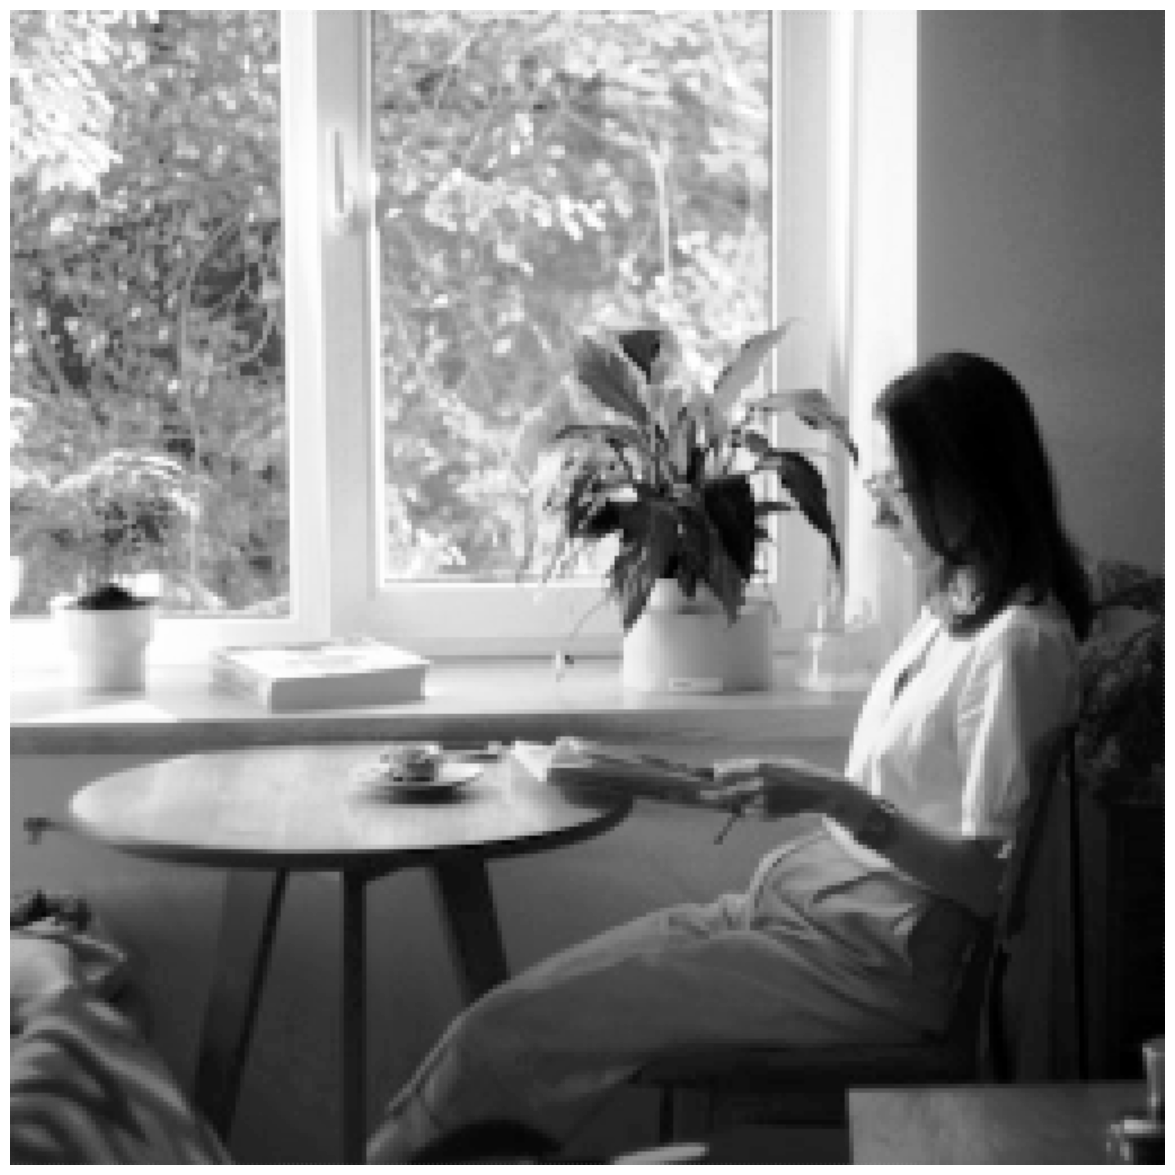

In [27]:
root_mean_squared_error(join_gamma_correction(read_low_images(), gamma), read_high_image()) 

C:\Users\Lucas\AppData\Local\Temp\ipykernel_26324\2090216886.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return imageio.imread(f"images/{high_image_name}")


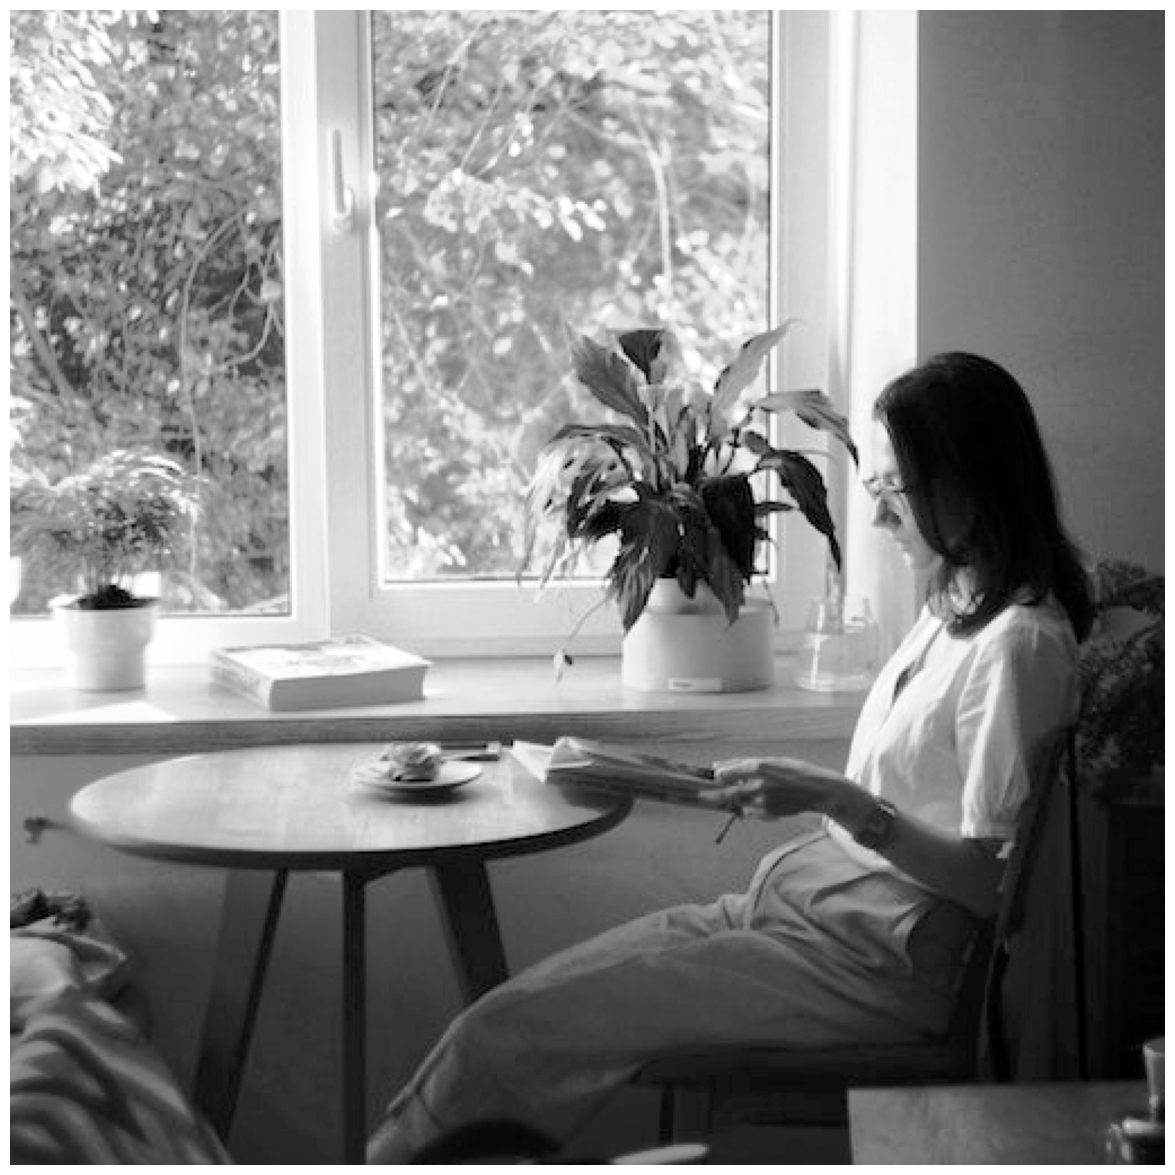

In [22]:
print_image(read_high_image())

In [ ]:
root_mean_squared_error(superresolution([low0, low1, low2, low3]), reference_image)